In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import Ridge

In [28]:
model = Ridge(alpha=10)

In [29]:
from sklearn.model_selection import cross_validate

In [30]:
scores = cross_validate(model,X_train,y_train,
                        scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],
                        cv=5)

In [31]:
scores

{'fit_time': array([0.00099897, 0.00099945, 0.00099969, 0.0010004 , 0.00099969]),
 'score_time': array([0.00099969, 0.00099945, 0.00099897, 0.0009973 , 0.00099945]),
 'test_neg_mean_absolute_error': array([-1.56003773, -1.02521183, -1.51687296, -1.05603169, -1.51515565]),
 'test_neg_mean_squared_error': array([-3.43538433, -1.40371139, -5.77843702, -2.18148674, -4.65088281]),
 'test_max_error': array([-3.52872765, -2.4322944 , -9.44712319, -4.41565323, -6.77828718])}

In [32]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.000999,0.001000,-1.560038,-3.435384,-3.528728
1,0.000999,0.000999,-1.025212,-1.403711,-2.432294
2,0.001000,0.000999,-1.516873,-5.778437,-9.447123
3,0.001000,0.000997,-1.056032,-2.181487,-4.415653
4,0.001000,0.000999,-1.515156,-4.650883,-6.778287


In [33]:
pd.DataFrame(scores).mean()

fit_time                        0.001000
score_time                      0.000999
test_neg_mean_absolute_error   -1.334662
test_neg_mean_squared_error    -3.489980
test_max_error                 -5.320417
dtype: float64

In [34]:
model = Ridge(alpha=1)

In [35]:
scores = cross_validate(model,X_train,y_train,
                        scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],
                        cv=5)

In [36]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.000999,0.000999,-1.547117,-3.155132,-3.088300
1,0.000999,0.000999,-1.026044,-1.580870,-2.817441
2,0.001000,0.000999,-1.400793,-5.404556,-9.353209
3,0.001000,0.000999,-1.154251,-2.216545,-4.055856
4,0.000998,0.001000,-1.470222,-4.367094,-6.490922


In [37]:
pd.DataFrame(scores).mean()

fit_time                        0.000999
score_time                      0.000999
test_neg_mean_absolute_error   -1.319685
test_neg_mean_squared_error    -3.344839
test_max_error                 -5.161145
dtype: float64

In [38]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mean_squared_error(y_test,y_pred)

2.319021579428752

In [43]:
round(r2_score(y_test, y_pred),2)

0.92

In [44]:
diff = pd.DataFrame({'True Value':y_test, 'Predicted':y_pred, 'Difference': y_test - y_pred})
diff[:20]

,True Value,Predicted,Difference
37,14.7,15.735442,-1.035442
109,19.8,19.561777,0.238223
31,11.9,11.472826,0.427174
89,16.7,16.996144,-0.296144
66,9.5,9.195839,0.304161
119,6.6,7.060343,-0.460343
54,20.2,20.240785,-0.040785
74,17.0,17.270475,-0.270475
145,10.3,9.799706,0.500294
142,20.1,19.189694,0.910306


In [45]:
diff.mean()

True Value    13.348333
Predicted     13.536036
Difference    -0.187702
dtype: float64

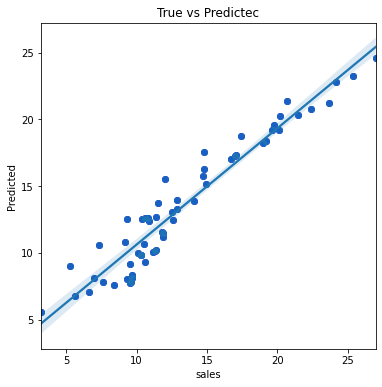

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Value')
plt.ylabel('Predicted')
plt.title('True vs Predictec')
sns.regplot(x=y_test, y=y_pred);